# Exercise 1


## Task 1

In [18]:
using LinearAlgebra 
using Plots

In [43]:
#implement leap frog for 1 body keppler problem
#motion of the one (only one) object lies in a plan -> 2d Problem
#the plain is spaned by r(0) and v(0)
#The sun is at (0,0,0)

function law(r,G,M)
    R = sqrt(sum(r.^2))
    eᵣ = r./R
    return eᵣ .* (-G*M/(R^2)) 
end


#leap frog alorithm for the keppler problem with one moving body
function one_body_keppler(N,Δt,r₀,v₀)  
    #starting position
    r = zeros(2,N)
    r[:,1] = r₀
    v = zeros(2,N)
    v[:,1] = v₀
    a = zeros(2,N)
    a[:,1] = law(r₀,G,M)
        
    #upadate rule
    for i in 1:N-1   
        r[:,i+1] = r[:,i] + v[:,i] .* Δt + a[:,i] .* (Δt)^2*0.5
        a[:,i+1] = law(r[:,i+1],G,M)
        v[:,i+1] = v[:,i] + Δt .* (a[:,i+1] + a[:,i])/2
    end
    return r,v,a
end

one_body_keppler (generic function with 1 method)

In [45]:
N = 100
Δt = 0.1
r₀ = [1,0]
v₀ = [0,-1]
G = 1
M = 1

r,v,a = one_body_keppler(N,Δt,r₀,v₀)

([1.0 0.995 … -0.9469860752566477 -0.9089581317996542; 0.0 -0.1 … 0.33598451029291954 0.42809061651683245], [0.0 -0.09974813443329908 … 0.3336085998281092 0.42508954786811226; -1.0 -0.9950001874941408 … 0.9376195713507275 0.8999569119412206], [-1.0 -0.9949626886659815 … 0.9334166948364989 0.8962022659635626; -0.0 0.09999625011718408 … -0.3311701822319642 -0.42208300595817355])

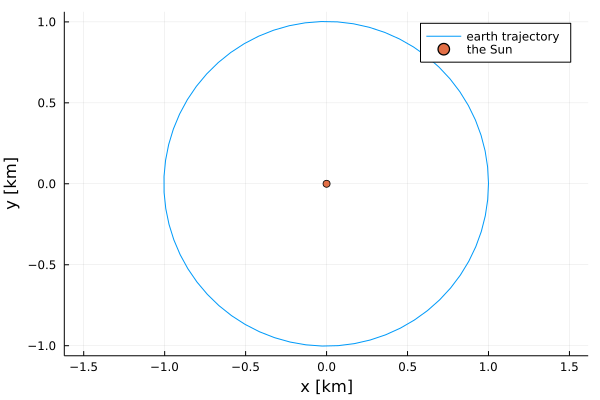

In [47]:
plot(r[1,:],r[2,:],aspectratio=1,xlabel="x [km]", ylabel="y [km]", label="earth trajectory")
scatter!([0.], [0.], label="the Sun")

# Task 2

In [14]:
# 3 body keppler Problem 
#therfore we just need to update the force rule such that it also takes the atraction from the other planet into account.

function law_on_r1(r₁,r₂,G,M,m)
    R₁ = sqrt(sum(r₁.^2))
    R₂ = sqrt(sum(r₂.^2))
    R₁₂ = sqrt(sum((r₁-r₂).^2))
    e₁₂ = (r₁-r₂)./R₁₂
    e₁ = r₁./R₁
    return e₁ .* (-G*M/(R₁^2)) + e₁₂ .* (-G*m/(R₁₂^2))
end


function two_body_keppler(N,Δt,r₀,v₀,r₁,v₁,G,M,m₀,m₁)  
    #starting position
    r1 = zeros(2,N)
    r1[:,1] = r₀
    v1 = zeros(2,N)
    v1[:,1] = v₀
    a1 = zeros(2,N)
    a1[:,1] = law_on_r1(r₀,r₁,G,M,m₁)
    
    r2 = zeros(2,N)
    r2[:,1] = r₁
    v2 = zeros(2,N)
    v2[:,1] = v₁
    a2 = zeros(2,N)
    a2[:,1] = law_on_r1(r₁,r₀,G,M,m₀)
        
        
    #upadate rule
    for i in 1:N-1   
        r1[:,i+1] = r1[:,i] + v1[:,i] .* Δt + a1[:,i] .* (Δt)^2*0.5
        r2[:,i+1] = r2[:,i] + v2[:,i] .* Δt + a2[:,i] .* (Δt)^2*0.5
        a1[:,i+1] = law_on_r1(r1[:,i+1],r2[:,i+1],G,M,m₁)
        a2[:,i+1] = law_on_r1(r2[:,i+1],r1[:,i+1],G,M,m₀)
        v1[:,i+1] = v1[:,i] + Δt .* (a1[:,i+1] + a1[:,i])/2
        v2[:,i+1] = v2[:,i] + Δt .* (a2[:,i+1] + a2[:,i])/2
    end
    
    return r1,v1,a1,r2,v2,a2
end

two_body_keppler (generic function with 1 method)

In [30]:
N = 200
Δt = 0.1
r₀ = [1,0]
v₀ = [0,-1]
r₁ = [1.1,0]
v₁ = [0,1]
G = 1
M = 1
m₀ = 0.1
m₁ = 0.2

r1,v1,a1,r2,v2,a2 = two_body_keppler(N,Δt,r₀,v₀,r₁,v₁,G,M,m₀,m₁)

([1.0 1.0949999999999998 … -0.48160149454187257 -0.44477135204296364; 0.0 -0.1 … -0.09527376986296444 0.059023806080513566], [0.0 0.8525682743849385 … 0.16009208594666818 0.6201672841821948; -1.0 -0.7672752446466339 … 1.500830830373467 1.5124207699986436], [18.999999999999964 -1.9486345123011928 … 4.164186780848423 5.037317183862109; -0.0 4.654495107067322 … 0.8428985812262584 -0.6110997887227247], [1.1 1.0458677685950415 … 0.822717901760862 0.7607678765306582; 0.0 0.1 … 0.4279679331541364 0.5117000045299938], [0.0 -0.5582893793770125 … -0.5655735304146432 -0.6716784299978251; 1.0 0.8812068527794321 … 0.865093078469493 0.8030638454900595], [-10.826446280991718 -0.3393413065485321 … -1.0785344377478778 -1.04356355391576; -0.0 -2.3758629444113577 … -0.5554472942183858 -0.685137365370284])

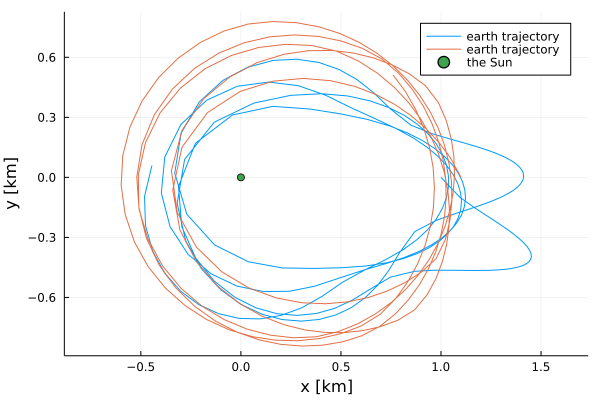

In [31]:
plot(r1[1,:],r1[2,:],aspectratio=1,xlabel="x [km]", ylabel="y [km]", label="earth trajectory")
plot!(r2[1,:],r2[2,:],aspectratio=1,xlabel="x [km]", ylabel="y [km]", label="earth trajectory")
scatter!([0.], [0.], label="the Sun")